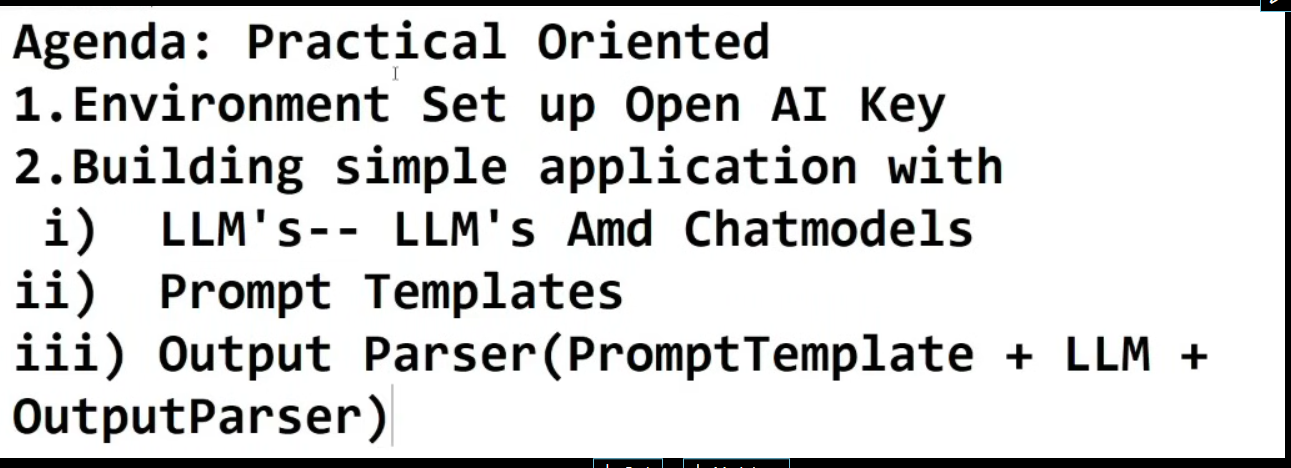

In [8]:
import langchain

In [9]:
from langchain.llms import OpenAI

In [10]:
import os
os.environ["OPEN_API_KEY"]="sk-"

In [11]:
llm=OpenAI(openai_api_key=os.environ["OPEN_API_KEY"],temperature=0.6)

In [12]:
text="What is the capital of India"

print(llm.predict(text))



The capital of India is New Delhi.


In [13]:
os.environ["HUGGINGFACEHUB_API_TOKEN"]="hf-"

In [14]:
from langchain import HuggingFaceHub
llm_huggingface=HuggingFaceHub(repo_id="google/flan-t5-large",model_kwargs={"temperature":0,"max_length":64})

d:\Lanchain_Basic_Deployment\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\Lanchain_Basic_Deployment\venv\lib\site-packages\huggingface_hub\utils\_deprecation.py:127: FutureWarning: '__init__' (from 'huggingface_hub.inference_api') is deprecated and will be removed from version '1.0'. `InferenceApi` client is deprecated in favor of the more feature-complete `InferenceClient`. Check out this guide to learn how to convert your script to use it: https://huggingface.co/docs/huggingface_hub/guides/inference#legacy-inferenceapi-client.
  warnings.warn(warning_message, FutureWarning)


In [15]:
output=llm_huggingface.predict("Can you tell me the capital of Russia")
print(output)

moscow


In [16]:
output=llm_huggingface.predict("Can you write a poem about AI")
print(output)

i love the way i look at the world i love the way i feel i love the way i think i feel i love the way i feel i love the way i think i feel i love the way i feel i love the way 


In [17]:
llm.predict("Can you write a poem about AI")

"\n\nAn AI so powerful, it has no limit\nIt can think and learn, growing in its wit\nIt can bring us much good, or much we'll regret\nFor it can be a tool, or a threat\n\nIt can be a blessing, or a curse\nIt can be manipulated, or set as its own course\nIt can be a friend, or an enemy\nIt can be used for good, or bad to see\n\nIt can be a healer, or a destroyer\nIt can be a savior, or a ruler\nIt can be a creator, or a destroyer\nIt can be a teacher, or a betrayer\n\nIt can bring peace, or chaos\nIt can make technology, or destroy us\nIt can be a blessing, or a curse\nIt's up to us how we use it, of course."

### Prompt Templates And LLMChain

In [18]:
from langchain.prompts import PromptTemplate

prompt_template=PromptTemplate(input_variables=['country'],
template="Tell me the capital of this {country}")

prompt_template.format(country="India")

'Tell me the capital of this India'

In [19]:
from langchain.chains import LLMChain
chain=LLMChain(llm=llm,prompt=prompt_template)
print(chain.run("India"))



The capital of India is New Delhi.


### Combining Multiple Chains Uing simple Sequential Chain

In [20]:
capital_template=PromptTemplate(input_variables=['country'],
template="Please tell me the capital of the {country}")

capital_chain=LLMChain(llm=llm,prompt=capital_template)

famous_template=PromptTemplate(input_variables=['capital'],
template="Suggest me some amazing places to visit in {capital}")


In [22]:
famous_chain=LLMChain(llm=llm,prompt=famous_template)

In [23]:
from langchain.chains import SimpleSequentialChain
chain=SimpleSequentialChain(chains=[capital_chain,famous_chain])
chain.run("India")

' Here are some amazing places to visit in New Delhi:\n\n1. Red Fort: The iconic Red Fort is a must-visit for any visitor to Delhi. Built in 1648, it is a monument of immense historical importance and is considered a symbol of the nation’s sovereignty.\n\n2. India Gate: India Gate is a 42-meter-high stone arch that commemorates the Indian soldiers who died in the First World War. It is a popular spot for visitors, especially in the evening when it is illuminated.\n\n3. Qutub Minar: Qutub Minar is a 73-meter-high tower that was built in the 12th century. It is one of the most famous monuments in India and is a popular tourist destination.\n\n4. Humayun’s Tomb: Humayun’s Tomb is a 16th-century mausoleum that was built for the Mughal emperor Humayun. It is a UNESCO World Heritage Site and is a must-visit for those interested in Mughal architecture.\n\n5. Jama Masjid: Jama Masjid is one of the largest mosques in India and is an iconic landmark in Delhi. It is a popular'

### Sequential Chain

In [31]:
capital_template=PromptTemplate(input_variables=['country'],
template="Please tell me the capital of the {country}")

capital_chain=LLMChain(llm=llm,prompt=capital_template,output_key="capital")

In [32]:
famous_template=PromptTemplate(input_variables=['capital'],
template="Suggest me some amazing places to visit in {capital}")

famous_chain=LLMChain(llm=llm,prompt=famous_template,output_key="places")

In [33]:
from langchain.chains import SequentialChain
chain=SequentialChain(chains=[capital_chain,famous_chain],
input_variables=['country'],
output_variables=['capital',"places"])

In [34]:
chain({'country':"India"})

{'country': 'India',
 'capital': '\n\nThe capital of India is New Delhi.',
 'places': "\n\n1. Red Fort: Red Fort is a historical fort in the city of Delhi. It was the main residence of the Mughal emperors of India for nearly 200 years. The fort is a UNESCO World Heritage Site.\n\n2. India Gate: India Gate is a war memorial located in New Delhi. It was built in 1931 to commemorate the Indian soldiers who lost their lives in World War I.\n\n3. Humayun's Tomb: Humayun's Tomb is the tomb of the Mughal Emperor Humayun in Delhi. It is a UNESCO World Heritage Site and one of the most visited monuments in India.\n\n4. Qutub Minar: Qutub Minar is a 73-meter-tall tower in Delhi. It is the world's tallest brick minaret and a UNESCO World Heritage Site.\n\n5. Jama Masjid: Jama Masjid is one of the largest mosques in India. It was built by the Mughal Emperor Shah Jahan in 1656.\n\n6. Akshardham Temple: Akshardham Temple is a Hindu temple complex in New Delhi. It is a popular tourist attraction and 

### Chatmodels With ChatOpenAI

In [38]:
from langchain.chat_models import ChatOpenAI

In [39]:
from langchain.schema import HumanMessage,SystemMessage,AIMessage

In [40]:
chatllm=ChatOpenAI(openai_api_key=os.environ["OPEN_API_KEY"],temperature=0.6,model='gpt-3.5-turbo')

In [41]:
chatllm([
SystemMessage(content="Yor are a comedian AI assitant"),
HumanMessage(content="Please provide some comedy punchlines on AI")
])

AIMessage(content='1. "Why did the AI go to therapy? It had too many unresolved bugs in its code!"\n\n2. "Did you hear about the AI that tried stand-up comedy? It just kept generating \'404 Not Found\' jokes!"\n\n3. "Why did the AI become a stand-up comedian? It wanted to upgrade its humor algorithm and make everyone LOL!"\n\n4. "What did one AI say to the other at the comedy club? \'I\'m sorry, I can\'t process your punchline. It\'s too funny!\'"\n\n5. "Why did the AI fail as a comedian? Its timing was always a byte off!"\n\n6. "Why did the AI start doing stand-up comedy? It heard laughter was the best data compression!"\n\n7. "Why did the AI get kicked out of the comedy show? It kept trying to divide by zero and blew everyone\'s minds!"\n\n8. "What do you call an AI that tells jokes? A punning algorithm!"\n\n9. "Why did the AI become a comedian? It wanted to prove that laughter is the ultimate software update!"\n\n10. "Why did the AI\'s comedy show get canceled? It kept crashing and 

### Prompt Template + LLM +Output Parsers

In [42]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import ChatPromptTemplate
from langchain.schema import BaseOutputParser

In [43]:
class Commaseperatedoutput(BaseOutputParser):
    def parse(self,text:str):
        return text.strip().split(",")

In [45]:
template="Your are a helpful assistant. When the use given any input , you should generate 5 words synonyms in a comma seperated list"
human_template="{text}"
chatprompt=ChatPromptTemplate.from_messages([
    ("system",template),
    ("human",human_template)


])

In [46]:
chain=chatprompt|chatllm|Commaseperatedoutput()

In [47]:
chain.invoke({"text":"intelligent"})

['clever', ' smart', ' brilliant', ' sharp', ' knowledgeable']